In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# cv2 to matplotlib
def cv2mat(img):
    b,g,r = cv2.split(img)
    ret = cv2.merge([r,g,b])
    return ret

def cv_show(img):
    plt.imshow(cv2mat(img))
    

def cv_show1(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey() #ms 不输入代表任意键销毁窗口
    cv2.destroyAllWindows()

# DFT转换

In [6]:
# 导入灰度图片
img_car_gray = cv2.imread("01_Picture/08_Car.png",0)

# 转换成float32
img_car_gray_float = np.float32(img_car_gray)
print(img_car_gray.dtype, img_car_gray_float.dtype)

# dft 信息获取
dft = cv2.dft(img_car_gray_float, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) #将低频区转换到中间

print("dft.shape:",dft.shape,",dft有两个通道")

uint8 float32
dft.shape: (550, 949, 2) ,dft有两个通道


In [24]:
# 得到灰度图可以表示的形式    
    # 计算频谱信息的幅度。 返回值=cv2.magnitude (参数 1，参数 2) 其中： 参数 1： 浮点型 x 坐标值，也就是实部。 参数 2： 浮点型 y 坐标值，也就是虚部，它必须和参数 1 具有相同的大小
def normalize(x):
    return (x-np.min(x))/(np.max(x)-np.min(x))

dft_mag = cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])
dft_img_gray = normalize(dft_mag) * 255
cv_show1(dft_img_gray)

## 低通滤波

(Text(0.5, 1.0, 'Result'), ([], []), ([], []))

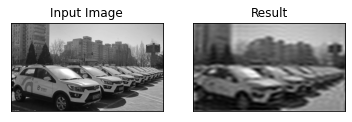

In [46]:
# 导入灰度图片
img_car_gray = cv2.imread("01_Picture/08_Car.png",0)
rows,cols = img_car_gray.shape
crow,ccol = int(rows/2),int(cols/2) # 中心位置

# 转换成float32
img_car_gray_float = np.float32(img_car_gray)

# dft 信息获取
dft = cv2.dft(img_car_gray_float, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) #将低频区转换到中间

# 低频掩码-低通滤波
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-20:crow+20,ccol-20:ccol+20] = 1
dft_shift_mask = dft_shift*mask

# 傅里叶逆变换
dft_ishift = np.fft.ifftshift(dft_shift_mask)
img_car_gray_back = cv2.idft(dft_ishift)
img_car_gray_back = cv2.magnitude(img_car_gray_back[:,:,0],img_car_gray_back[:,:,1]) # 将实部虚部结合

# 绘图
plt.subplot(121),plt.imshow(img_car_gray,cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_car_gray_back,cmap='gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

## 高通滤波

(Text(0.5, 1.0, 'Result'), ([], []), ([], []))

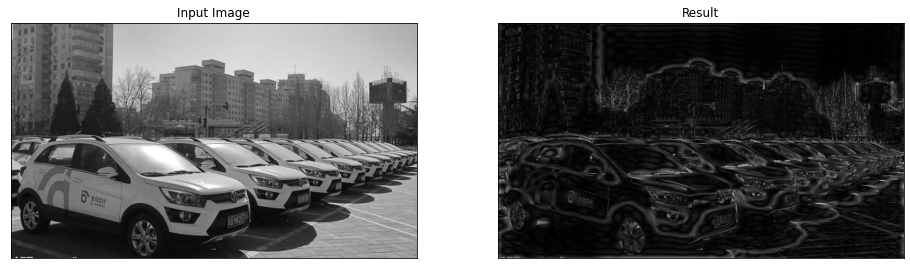

In [48]:
# 导入灰度图片
img_car_gray = cv2.imread("01_Picture/08_Car.png",0)
rows,cols = img_car_gray.shape
crow,ccol = int(rows/2),int(cols/2) # 中心位置

# 转换成float32
img_car_gray_float = np.float32(img_car_gray)

# dft 信息获取
dft = cv2.dft(img_car_gray_float, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft) #将低频区转换到中间

# 高通滤波
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-20:crow+20,ccol-20:ccol+20] = 0
dft_shift_mask = dft_shift*mask

# 傅里叶逆变换
dft_ishift = np.fft.ifftshift(dft_shift_mask)
img_car_gray_back = cv2.idft(dft_ishift)
img_car_gray_back = cv2.magnitude(img_car_gray_back[:,:,0],img_car_gray_back[:,:,1]) # 将实部虚部结合

# 绘图
plt.figure(figsize=(16,10))
plt.subplot(121),plt.imshow(img_car_gray,cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_car_gray_back,cmap='gray')
plt.title('Result'), plt.xticks([]), plt.yticks([])

# 效果展示

In [72]:
def draw_contours(img,value=30,title="dft-contours"):
    rows,cols = img.shape
    crow,ccol = int(rows/2),int(cols/2) # 中心位置

    # 转换成float32
    img_gray_float = np.float32(img)

    # dft 信息获取
    dft = cv2.dft(img_gray_float, flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft) #将低频区转换到中间

    # 高通滤波
    mask = np.ones((rows,cols,2),np.uint8)
    mask[crow-value:crow+value,ccol-value:ccol+value] = 0
    dft_shift_mask = dft_shift*mask

    # 傅里叶逆变换
    dft_ishift = np.fft.ifftshift(dft_shift_mask)
    img_gray_back = cv2.idft(dft_ishift)
    img_gray_back = cv2.magnitude(img_gray_back[:,:,0],img_gray_back[:,:,1]) # 将实部虚部结合

    # 绘图
    plt.imshow(img_gray_back,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(title)


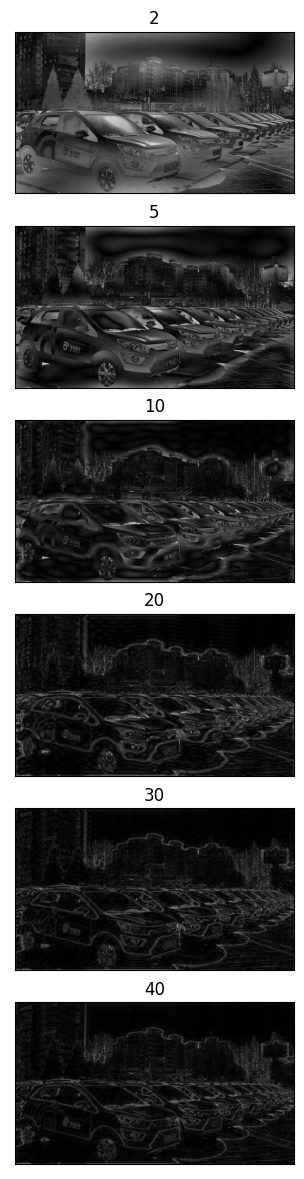

In [73]:
plt.figure(figsize=(4,15),dpi=100)
values = [2,5,10,20,30,40]
for index,value in enumerate(values):
    plt.subplot(len(values),1,index+1)
    img_car_gray = cv2.imread("01_Picture/08_Car.png",0)
    draw_contours(img_car_gray,value=value,title=f"{value}")  

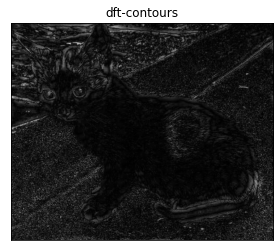

In [80]:
img_car_gray = cv2.imread("01_Picture/01_cat.jpg",0)
draw_contours(img_car_gray,value=15,title="dft-contours")

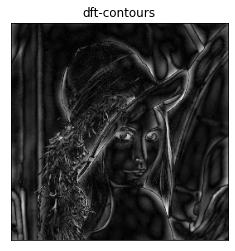

In [87]:
img_car_gray = cv2.imread("01_Picture/07_Lena.jpg",0)
draw_contours(img_car_gray,value=8,title="dft-contours")